In [14]:
import sys
sys.path.append('e:\solar flares\data\\2017-09-06')


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_12972\607442616.py:2: SyntaxWarning: invalid escape sequence '\s'
  sys.path.append('e:\solar flares\data\\2017-09-06')


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import use_nessi as un
import use_nessi2 as un2
# import os
from importlib import reload

# from matplotlib import cm
# import matplotlib.cbook as cbook
# import matplotlib.colors as colors
# from scipy.interpolate import interp1d
from PIL import Image
from matplotlib import transforms



sr = solar_radius = 959.63
area_factor = 60**2/np.pi/sr**2

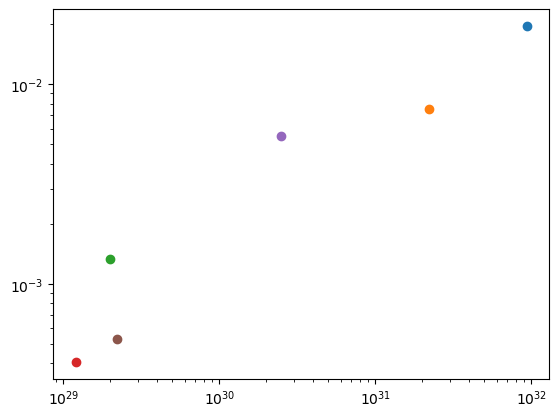

In [16]:
def solar_flare_energy(flare_class):
  """
  Calculates the energy of a solar flare based on its class.

  Args:
    flare_class: The class of the solar flare (e.g., 'X1.0', 'M1.0').

  Returns:
    The energy of the solar flare in ergs.
  """

  class_letter = flare_class[0]
  class_number = float(flare_class[1:])

  if class_letter == 'X':
    energy = 1e31 * class_number  # X-class flares start at 10^31 ergs
  elif class_letter == 'M':
    energy = 1e31 * class_number / 10  # M-class flares are 100 times weaker than X-class
  elif class_letter == 'C':
    energy = 1e31 * class_number / 100  # C-class flares are 10000 times weaker than X-class
  elif class_letter == 'B':
    energy = 1e31 * class_number / 1000  # B-class flares are 1000000 times weaker than X-class
  else:
    raise ValueError("Invalid solar flare class")

  return energy

CaK_lines = ['CaK17', 'CaK17_9u', 'CaK19', 'CaK21', 
             'CaK(2)23', 'CaK(2)23a' ]

Ha_lines = []

flaredata = {'X9.3':['2017-09-06', '11:53', '12:02','12:10', '17',   0.4], 
            'X8.2':['2017-09-10', '15:35', '16:06', '16:31', '17a',  0.5],
            'X2.2':['2017-09-06', '08:57', '09:10', '09:17', '17_9u',0.5], 
            'X1.5':['2014-06-10', '12:36', '12:52', '13:03', '14',   0.75], 
            'X1.0':['2021-10-28', '15:17', '15:23', '15:40', '21a',  0.1],
            'M3.0':['2022-05-20', '07:35', '07:45', '07:49', '22',   0.9], 
            'M2.5':['2023-06-09', '16:48', '17:11', '17:34', '23',   0.4], 
            'M1.9':['2015-09-27', '10:20', '10:40', '10:46', '15a',  0.05], 
            'M1.8':['2024-09-11', '12:27', '12:36', '12:47', '24a',  0.8], 
            'M1.1':['2014-09-06', '16:50', '17:09', '17:22', '14a',  1.0], 
            'C8.4':['2016-05-14', '11:28', '11:34', '11:37', '16',   1.0], 
            'C5.6':['2015-06-24', '15:12', '15:29', '15:40', '15',   0.10], 
            'C4.1':['2011-08-06', '08:37', '08:47', '08:51', '11',   0.5],             
            'C3.6':['2015-05-05', '11:55', '11:58', '12:00', '15b',  .95], 
            'C2.4':['2022-06-26', '08:00', '08:12',	'08:20', '22a',  0.9], 
            'C2.2':['2023-06-18', '09:31', '09:37', '10:09', '23a',  1.0], 
            'C2.0':['2019-05-06', '08:41', '08:47', '08:51', '19',   1.0], 
            'C1.5':['2013-06-30', '09:11', '09:18', '09:27', '13',   1.0], 
            'C1.2':['2021-05-26', '09:46', '09:55', '10:00', '21',   1.0]
    }


def flarename_from_name(name):
    fl = []
    nm = []
    for k in flaredata.keys():
        if flaredata[k][4] in name:
            fl.append(k)
            nm.append(flaredata[k][4])
            
    if len(fl) > 0 :
        l = [val for _, val in sorted(zip(nm, fl))]

        return l[-1]
    
    raise ValueError(f'the name {name} does not contain the flare number!')
    
def info_flare(flare):
    return flaredata[flare]

def get_data(lines):
    data = un.load_for_further_analysis(lines, un.get_full_path(lines[0]))
    for line in lines:
        if "CaK" in line:
            un2.disgard_cont_point(line, data)
    
    return data 

def name_2_energy_contrast(name):
    flare = flarename_from_name(name)
    info = info_flare(flare)
    scalefactor = 1 / info[5]
    energy = solar_flare_energy(flare)
    
    data = get_data([name])
    wav, DFD , time, line, std = un2.contrast_FD_data(name,data, quiet_sun_subtraction=False, 
                                                          area_factor=area_factor*scalefactor, add_noise=False, theoretical=False)
    Max_contrast = -1 + np.max(DFD) #np.percentile(DFD, 0.99)

    return energy, Max_contrast


def generate_points():
    points = []
    for name in CaK_lines:
        points.append(name_2_energy_contrast(name))
    return points

def plot_points(points):
    fig, ax = plt.subplots(1,1)
    for point in points:
        ax.loglog(point[0], point[1], "o")
    plt.show()
    
points = generate_points()
plot_points(points)

['Fe21a', 'CaIR21a', 'CaIR23a', 'Ha23a', 'Hbeta23a', 'CaK(2)23a', 'He23a', 'CaIR23', 'Ha23', 'Hbeta23', 'CaK(2)23', 'He23', 'CaIR22', 'Fe21', 'CaIR21', 'CaK21', 'CaIR16', 'Ha16', 'He15b', 'Fe6173_2019', 'CaIR19', 'CaK19', 'CaIR14a', 'Ha14a', 'CaIR17a', 'Hbeta17a', 'CaII17', 'Ha17', 'CaK17', 'CaIR17_9u', 'Ha17_9u', 'CaK17_9u', 'Ha13', 'CaIR15a', 'Ha15a', 'CaIR15', 'Ha15', 'CaIR22a', 'Ha22a', 'CaIR24a']
Assuming that Fe21a is spectral line Fe6173.
{'$\\rm{Fe}~I~6173~\\rm{\\AA}$'}
{'$\\rm{Fe}~I~6173~\\rm{\\AA}$', '$\\rm{Ca}~\\rm{II}~8542~\\rm{\\AA}$'}
{'$\\rm{Fe}~I~6173~\\rm{\\AA}$', '$\\rm{H}\\alpha$', '$\\rm{Ca}~\\rm{II}~8542~\\rm{\\AA}$'}
{'$\\rm{Fe}~I~6173~\\rm{\\AA}$', '$\\rm{H}\\alpha$', '$\\rm{Ca}~\\rm{II}~8542~\\rm{\\AA}$', '$\\rm{H}\\beta$'}
{'$\\rm{H}\\alpha$', '$\\rm{H}\\beta$', '$\\rm{Fe}~I~6173~\\rm{\\AA}$', '$\\rm{Ca}~\\rm{II}~\\rm{H}$', '$\\rm{Ca}~\\rm{II}~8542~\\rm{\\AA}$'}
{'$\\rm{H}\\alpha$', '$\\rm{H}\\beta$', '$\\rm{He}~I~D3$', '$\\rm{Fe}~I~6173~\\rm{\\AA}$', '$\\rm{Ca

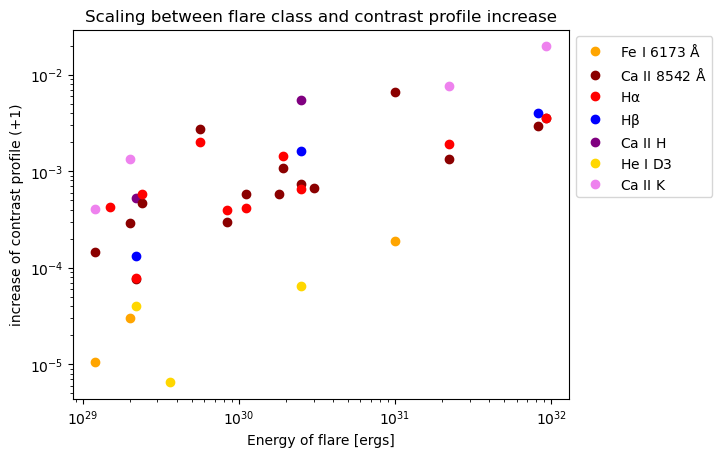

In [17]:
lines = [["Fe21a", "CaIR21a"],
        [ "CaIR23a", "Ha23a", "Hbeta23a", "CaK(2)23a","He23a"],
        ["CaIR23","Ha23", "Hbeta23", "CaK(2)23","He23"],
        ["CaIR22"],
        ["Fe21", "CaIR21",  "CaK21"],
        ["CaIR16", "Ha16"],
        ["He15b"],
        ["Fe6173_2019", "CaIR19",  "CaK19"],
        [ "CaIR14a", "Ha14a"],
        ["CaIR17a", "Hbeta17a"],
        ["CaII17", "Ha17", "CaK17" ],
        ["CaIR17_9u", "Ha17_9u",  "CaK17_9u"],
        ["Ha13"],
        ["CaIR15a", "Ha15a"],
        ["CaIR15", "Ha15"], 
        ["CaIR22a", "Ha22a"],
        ["CaIR24a"]]
lines = [l for fl in lines for l in fl]
print(lines)

def color_for_name(name):
    colors = {'Ha':'red', 'CaK(2)':'purple', 'CaK':'violet', 'CaI':"darkred", "Fe":"orange", "Hbeta":"blue", "He":"gold"}
    for line in colors:
        if line in name:
            return colors[line]
    raise ValueError(f'The given name {name} is not linked to a color yet.')

def latex_name(name): 
    names = {"Ha":r"$\rm{H}\alpha$", 
             "CaK":r'$\rm{Ca}~\rm{II}~\rm{K}$', 
             "CaIR":r'$\rm{Ca}~\rm{II}~8542~\rm{\AA}$', 
             "Fe6173":r'$\rm{Fe}~I~6173~\rm{\AA}$', 
             "Hbeta":r'$\rm{H}\beta$', 
             "CaK(2)":r'$\rm{Ca}~\rm{II}~\rm{H}$', 
             "He":r'$\rm{He}~I~D3$'}   # r'$\rm{He}~I~5876\rm{\AA}$'}
    el = un2.element_from_name(name)
    try:
        return names[el]
    except:
        raise ValueError(f"Name {names} is not found in the keys {names.keys()}.")
    
    

def loop_through_lines(lines):
    fig, ax = plt.subplots(1,1)
    ax.set_title("Scaling between flare class and contrast profile increase")
    ax.set_xlabel("Energy of flare [ergs]")
    ax.set_ylabel("increase of contrast profile (+1)")
    s = set()
    x=[]
    y=[]
    for line in lines:
        Energy, contr = name_2_energy_contrast(line)
        x.append(Energy)
        y.append(contr)
        el = latex_name(line)
        col = color_for_name(line)
        if el not in s:
            ax.loglog(Energy, contr, "o",color=col, label=el)
            s.add(el)
            print(s)
        else:
            ax.loglog(Energy, contr, "o-", color=col)

    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()
    return x,y
    
x, y = loop_through_lines(lines)

In [18]:
from scipy import stats as st
y = st.linregress(np.log(x), np.log(y))
y, y[0]

(LinregressResult(slope=0.5617913445274257, intercept=-46.52946138052781, rvalue=0.678065479122046, pvalue=1.5307362175624845e-06, stderr=0.09878700905659658, intercept_stderr=6.8715992473662455),
 0.5617913445274257)

power seems to be 0.23 approximately fourth root. but this might deviate for the different elements

In [19]:


# def loop_through_lines_per_element(lines):
#     fig, ax = plt.subplots(1,1)
#     ax.set_title("Scaling between flare class and contrast profile increase")
#     ax.set_xlabel("Energy of flare [ergs]")
#     ax.set_ylabel("increase of contrast profile (+1)")
#     x={}
#     y={}
#     for line in lines:
#         Energy, contr = name_2_energy_contrast(line)
#         el = un2.element_from_name(line)
#         if not( el == 'Fe6173' ):
#             latel = latex_name(line)
#             col = color_for_name(el)
#             if el in x.keys():
#                 x[el].append(Energy)
#                 y[el].append(contr)
#             else:
#                 x[el] = [Energy]
#                 y[el] = [contr]
            
#     all_x=[]
#     all_y=[]
#     handels=[]
#     labels=[]
#     for el in x.keys():
#         I = st.linregress(np.log(x[el]), np.log(y[el]))
#         r = np.linspace(27, 32, 100) 
#         t = np.exp( I[0] * r * np.log(10) + I[1])
#         col = color_for_name(el)
#         all_x.extend(x[el])
#         all_y.extend(y[el])
        
#         if len(x[el]) <4:
#             ax.loglog(x[el], y[el], "+", color=col, label=f'{latex_name(el)}')
#         else:
#             ax.loglog(x[el], y[el], "o", color=col)
#             ax.loglog(10**r, t, '--', color=col, label=f'{latex_name(el)}, slope {round(I[0], 3)}')
#             f'{latex_name(el)}, slope {round(I[0], 3)}'
#     I = st.linregress(np.log(all_x), np.log(all_y))
#     r = np.linspace(27, 32, 100) 
#     t = np.exp( I[0] * r * np.log(10) + I[1])
#     print(I)
#     ax.loglog(10**r, t, '--', color='black', label=f'overal fit  slope {round(I[0], 3)}')
#     f'overal fit  slope {round(I[0], 3)}'
    
#     ax.set_ylim(1e-5, 3e-2)
    
#     lgd = plt.legend(bbox_to_anchor=(1, 1))
#     plt.show()
    
#     # fig.savefig("E:\solar flares\data\\full_analysis\\full_plots\scale_law_less.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    
#     print(x, y)
    
#     return x,y
    
# x, y = loop_through_lines_per_element(lines)

<>:63: SyntaxWarning: invalid escape sequence '\s'
<>:63: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_12972\3077051862.py:63: SyntaxWarning: invalid escape sequence '\s'
  fig.savefig("E:\solar flares\data\\full_analysis\\full_plots\scale_law.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')


Assuming that Fe21a is spectral line Fe6173.
Assuming that Fe21a is spectral line Fe6173.
Assuming that Fe21 is spectral line Fe6173.
Assuming that Fe21 is spectral line Fe6173.
LinregressResult(slope=0.5287213571363821, intercept=-44.120423901774856, rvalue=0.6955385379584703, pvalue=1.7677200713424663e-06, stderr=0.09231911451736363, intercept_stderr=6.428662914611479)
[<matplotlib.lines.Line2D object at 0x000001BE19E40EC0>, <matplotlib.lines.Line2D object at 0x000001BE19E41A60>, <matplotlib.lines.Line2D object at 0x000001BE19E19BE0>, <matplotlib.lines.Line2D object at 0x000001BE19E1ACF0>, <matplotlib.lines.Line2D object at 0x000001BE19E1AF00>, <matplotlib.lines.Line2D object at 0x000001BE19E1A870>, <matplotlib.lines.Line2D object at 0x000001BE19E1A660>, <matplotlib.lines.Line2D object at 0x000001BE19E40650>, <matplotlib.lines.Line2D object at 0x000001BE19E41760>, <matplotlib.lines.Line2D object at 0x000001BE19E1A0F0>, <matplotlib.lines.Line2D object at 0x000001BE19E436B0>] ['$\\rm{C

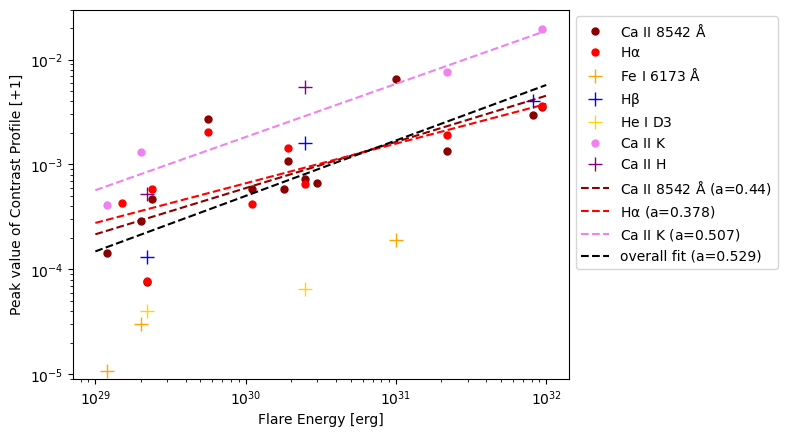

{'Fe6173': [1e+31, 1.1999999999999999e+29, 2e+29], 'CaIR': [1e+31, 2.2e+29, 2.4999999999999996e+30, 3e+30, 1.1999999999999999e+29, 2e+29, 1.1e+30, 8.199999999999999e+31, 9.3e+31, 2.2e+31, 1.8999999999999998e+30, 5.599999999999999e+29, 2.3999999999999997e+29, 1.8e+30], 'Ha': [2.2e+29, 2.4999999999999996e+30, 1.1e+30, 9.3e+31, 2.2e+31, 1.5e+29, 1.8999999999999998e+30, 5.599999999999999e+29, 2.3999999999999997e+29], 'Hbeta': [2.2e+29, 2.4999999999999996e+30, 8.199999999999999e+31], 'CaK(2)': [2.2e+29, 2.4999999999999996e+30], 'He': [2.2e+29, 2.4999999999999996e+30], 'CaK': [1.1999999999999999e+29, 2e+29, 9.3e+31, 2.2e+31]} {'Fe6173': [0.00018982672699641157, 1.0666709048035017e-05, 3.0233057788375817e-05], 'CaIR': [0.0065987098810347256, 7.649558982025795e-05, 0.0007335440760856127, 0.0006680076532337154, 0.00014463378377782554, 0.00029243792010857916, 0.0005819591373423805, 0.0029591982337486833, 0.0035369364633330846, 0.0013341840626790447, 0.0010786777854154828, 0.0027307824682838433, 

In [24]:


def loop_through_lines_per_element(lines):
    fig, ax = plt.subplots(1,1)
    # ax.set_title("Scaling between flare class and contrast profile increase")
    ax.set_xlabel("Flare Energy [erg]")
    ax.set_ylabel("Peak value of Contrast Profile [+1]")
    x={}
    y={}
    for line in lines:
        Energy, contr = name_2_energy_contrast(line)
        el = un2.element_from_name(line)
        latel = latex_name(line)
        col = color_for_name(el)
        if el in x.keys():
            x[el].append(Energy)
            y[el].append(contr)
        else:
            x[el] = [Energy]
            y[el] = [contr]
    all_x=[]
    all_y=[]
    handels=[]
    labels=[]
    handels1=[]
    labels1=[]
    handels2=[]
    labels2=[]
    r = np.linspace(29, 32, 100) 
    for el in [ 'CaIR', 'Ha', 'Fe6173', 'Hbeta', 'He','CaK', 'CaK(2)']:
        I = st.linregress(np.log(x[el]), np.log(y[el]))
        t = np.exp( I[0] * r * np.log(10) + I[1])
        col = color_for_name(el)
        all_x.extend(x[el])
        all_y.extend(y[el])
        
        if len(x[el]) <4:
            h, = ax.loglog(x[el], y[el], "+", color=col, label=f'{latex_name(el)}', markersize=10)
            l = fr'{latex_name(el)}'
            handels.append(h)
            labels.append(l)
        else:
            h, = ax.loglog(x[el], y[el], "o", color=col, markersize=5, label=f'{latex_name(el)}')
            l = fr'{latex_name(el)}'
            handels.append(h)
            labels.append(l)
            f, = ax.loglog(10**r, t, '--', color=col, label=f'{latex_name(el)} (a={round(I[0], 3)})')
            lf = fr'{latex_name(el)}, slope {round(I[0], 3)}'
            handels2.append(f)
            labels2.append(lf)
    I = st.linregress(np.log(all_x), np.log(all_y))
    t = np.exp( I[0] * r * np.log(10) + I[1])
    print(I)
    f, = ax.loglog(10**r, t, '--', color='black', label=f'overall fit (a={round(I[0], 3)})')
    handels2.append(f)
    ax.set_ylim(0.9e-5, 3e-2)
    
    handels = [*handels, *handels1, *handels2]
    labels = [*labels, *labels1, labels2]
    print(handels, labels)
    
    lgd = plt.legend(handles=handels, bbox_to_anchor=(1, 1))
    plt.show()
    
    fig.savefig("E:\solar flares\data\\full_analysis\\full_plots\scale_law.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    
    print(x, y)
    
    return x,y
    
x, y = loop_through_lines_per_element(lines_corr)

In [23]:
Not_good = ["X1.5", "C8.4", "C3.6" ] #, "C2.2"]
lines_corr = []
for l in lines:
    if not(flarename_from_name(l) in Not_good):
        lines_corr.append(l)
lines_corr, len(lines), len(lines_corr)

(['Fe21a',
  'CaIR21a',
  'CaIR23a',
  'Ha23a',
  'Hbeta23a',
  'CaK(2)23a',
  'He23a',
  'CaIR23',
  'Ha23',
  'Hbeta23',
  'CaK(2)23',
  'He23',
  'CaIR22',
  'Fe21',
  'CaIR21',
  'CaK21',
  'Fe6173_2019',
  'CaIR19',
  'CaK19',
  'CaIR14a',
  'Ha14a',
  'CaIR17a',
  'Hbeta17a',
  'CaII17',
  'Ha17',
  'CaK17',
  'CaIR17_9u',
  'Ha17_9u',
  'CaK17_9u',
  'Ha13',
  'CaIR15a',
  'Ha15a',
  'CaIR15',
  'Ha15',
  'CaIR22a',
  'Ha22a',
  'CaIR24a'],
 40,
 37)